<a href="https://colab.research.google.com/github/Nikolay1982Nikolaev/Big-Data-Bicocca/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

import nltk
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("omw-1.4")

from tqdm import tqdm
from nltk.stem import WordNetLemmatizer

from gensim.models.phrases import Phrases
from nltk.corpus import stopwords

from nltk.corpus import stopwords

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Data

In [8]:
FILEPATH = "/content/drive/MyDrive/00.Last_sprint_UNIVERSITA/06.BigData/"
DATAPATH = FILEPATH + "data/tripadvisor_hotel_reviews.csv"


In [9]:
df = pd.read_csv(DATAPATH)
df.head(10)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [10]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [11]:
df.columns = [x.lower() for x in df.columns]
df.rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: rating, dtype: int64

## Create Binary Target Variable

In [12]:
def binary(row):
    if row["rating"] > 3:
        val = 1
    elif row["rating"] < 3:
        val = 0
    else:
        val = -1
    return val

df["bin_y"] = df.apply(binary, axis=1)
df.head()

,review,rating,bin_y
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,-1
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1


## Remove NaN and split X and Y

In [13]:
df_not_na = df[~(df["review"].isna()) & ~(df["bin_y"]==1)]
raw_text = df_not_na["review"]
y = df_not_na["bin_y"].tolist()
raw_text[1]

'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman bu

## Lowercase, remove punctuation, tokenize, lemmatization

[NLTK](https://www.nltk.org/)

[tqdm](https://tqdm.github.io/)

In [14]:

lemmatizer = WordNetLemmatizer()

text = raw_text.str.lower().str.replace('[^a-z \s\d]',' ', regex=True) # \d tiene anche i caratteri numerici
text = text.str.split()
text = text.apply(lambda x: [lemmatizer.lemmatize(sent) for sent in x])
for row in tqdm(text):
    [row.remove(i) for i in row if len(i) < 2]
print(text[1])

  0%|          | 0/5398 [00:00<?, ?it/s]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None]

[None, None]

[None, None, None, None, None, None, None]

[None, None, None]

[]

[None, None, None, None]

[]

[None, None, None, None, None, None]

[None, None]

[None]

[]

[None, None, None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None]

[None, None, None, None, None, None]

[]

[]

[None, None, None, None]

[]

[]

[None, None, None, None, None]

[None, None]

[]

[None, None]

[None, None, None, None]

[None]

  1%|          | 30/5398 [00:00<00:18, 292.25it/s]

[]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[None]

[]

[None, None, None, None, None, None]

[None, None]

[None]

[None]

[]

[None, None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None]

[None, None]

[]

[None, None, None, None]

[None, None]

[None, None, None]

[None, None, None, None, None, None]

[None]

[]

[]

[]

[None]

[]

[None, None, None]

[None]

[None, None, None, None, None]

[]

[]

  1%|          | 64/5398 [00:00<00:17, 312.40it/s]

[None]

[None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None]

[]

[]

[None, None]

[None, None, None]

[None, None, None, None, None, None]

[]

[None, None, None, None]

[None, None, None, None]

[None]

[None]

[]

[None, None]

[None, None]

[None, None, None]

[None, None, None]

[None, None]

[None, None]

[]

[None, None, None, None, None]

[]

[]

[None, None]

[None, None, None]

[None, None]

[None, None, None, None]

[None, None, None, None, None]

  2%|▏         | 96/5398 [00:00<00:18, 292.45it/s]

[None, None]

[None, None]

[]

[None, None]

[None, None, None, None, None]

[]

[None]

[]

[None, None]

[None]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[]

[None]

[None, None, None]

[None, None]

[None]

[None, None, None, None]

[None, None]

[None]

[None, None]

[None, None, None, None]

[]

[]

[None]

[None, None]

[None]

[None, None]

[None]

[None, None, None, None]

[None, None, None, None, None, None, None, None]

[None]

[None]

[None, None]

  2%|▏         | 131/5398 [00:00<00:16, 310.94it/s]

[None, None, None]

[]

[None, None, None, None]

[None]

[None, None]

[None, None, None]

[None, None]

[None, None, None]

[None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None]

[None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[]

[None]

[None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

  3%|▎         | 163/5398 [00:00<00:18, 276.99it/s]

[None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None, None]

[None, None, None]

[None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None]

[None]

[None]

[None, None, None]

[None, None]

[None, None, None]

[None]

[]

[None, None]

[]

[None, None, None]

[]

[None, None, None, None, None]

[]

[None, None]

[None, None, None]

[]

[None, None]

[]

[None, None, None, None, None, None, None, None, None]

[]

[]

  4%|▎         | 195/5398 [00:00<00:17, 289.07it/s]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[]

[None, None]

[]

[None]

[None, None, None, None]

[None, None, None, None]

[None, None]

[None, None, None]

[]

[None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None]

[]

[None, None]

[]

[None]

[]

[]

[None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None]

[None]

[None]

[None]

[None, None]

[]

[None, None, None]

  4%|▍         | 226/5398 [00:00<00:17, 294.52it/s]

[None, None, None, None, None, None, None]

[None]

[None, None, None]

[]

[None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None]

[]

[]

[]

[None]

[]

[None, None, None, None, None, None]

[None, None, None]

[None, None]

[None, None]

[None]

[]

[None, None, None]

[None]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[]

[None, None, None, None, None, None]

[None, None]

[None]

[None, None, None, None, None, None, None]

[None]

  5%|▍         | 256/5398 [00:00<00:18, 280.32it/s]

[None, None, None]

[]

[None, None, None, None]

[]

[None, None, None, None, None, None, None, None]

[None, None]

[]

[]

[None]

[]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None]

[None, None, None, None, None]

[]

[None, None]

[None, None]

[None]

[None, None, None, None, None]

[None, None, None]

[None]

[]

[None, None, None, None, None, None, None, None]

[]

[None]

[None, None, None, None, None]

[None, None, None, None]

[None, None]

  5%|▌         | 285/5398 [00:00<00:18, 273.33it/s]

[None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[]

[None, None, None]

[None, None, None, None, None]

[None]

[None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None]

[None]

[None]

[None, None, None]

[None, None]

[None]

[None, None]

[None, None, None]

[None]

[None, None, None, None]

[None, None]

[None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None]

[None, None, None]

[]

  6%|▌         | 313/5398 [00:01<00:18, 274.01it/s]

[]

[None]

[None, None]

[None, None, None, None]

[None]

[None]

[None]

[None]

[None]

[None, None]

[None, None]

[]

[]

[None]

[None, None]

[None, None, None, None, None, None, None, None, None]

[]

[None]

[None]

[]

[None]

[]

[None, None, None, None]

[None, None, None, None, None]

[None]

[]

[None, None, None]

[None]

  6%|▋         | 341/5398 [00:01<00:18, 275.01it/s]

[None, None, None]

[None, None]

[None, None]

[]

[None]

[None, None]

[None, None, None, None]

[]

[]

[None, None, None]

[None, None, None, None, None, None]

[None]

[None, None]

[None]

[None]

[]

[]

[None]

[]

[]

[None, None]

[None]

[None]

[]

[None]

[]

[None]

[]

[None, None, None, None, None, None, None, None]

[None]

[None]

[None, None]

[None]

[None, None]

[None, None]

  7%|▋         | 376/5398 [00:01<00:16, 296.42it/s]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None, None]

[None]

[None, None]

[]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None]

[None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[None]

[None]

[]

[None, None, None, None]

[None, None]

[]

[]

[None, None, None]

[]

[None]

[]

[None]

[None, None, None, None, None, None, None, None, None]

  8%|▊         | 408/5398 [00:01<00:16, 302.58it/s]

[]

[None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[]

[None]

[]

[None, None, None]

[None, None]

[]

[None, None, None, None, None, None, None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None]

[]

[None, None, None, None, None, None, None, None]

[None, None]

[None]

[]

[None]

[]

[None, None, None]

[None]

[None, None]

  8%|▊         | 440/5398 [00:01<00:16, 306.44it/s]

[None]

[None, None]

[]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None, None, None, None, None]

[None]

[]

[None]

[None]

[]

[]

[None, None]

[]

[None]

[]

[]

[None, None]

[None, None, None, None, None, None]

[]

[None, None]

[]

[None, None]

[None, None, None]

[None, None]

[None]

[None, None]

[None, None]

[None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None]

  9%|▉         | 475/5398 [00:01<00:15, 319.20it/s]

[None, None]

[None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None]

[None, None]

[None]

[None]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None]

[None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[None]

[None, None, None]

[]

[None]

[None]

[None]

[None, None, None, None, None, None]

[None]

[None, None]

[None, None]

[None]

[None, None]

[None, None, None, None]

[]

  9%|▉         | 508/5398 [00:01<00:15, 319.17it/s]

[]

[None, None, None]

[None, None]

[]

[]

[None, None, None, None, None]

[]

[None]

[None, None, None]

[None, None, None]

[None, None, None, None, None]

[None, None]

[]

[None, None]

[]

[None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None, None]

[None]

[None]

[None, None]

[]

[None, None, None]

[None]

[None]

[None, None, None, None, None]

[None]

[]

[]

[None, None, None]

[None]

[None, None]

 10%|█         | 541/5398 [00:01<00:15, 322.19it/s]

[None]

[None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None]

[None, None]

[]

[None, None]

[None]

[None, None, None]

[]

[None]

[None]

[]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None]

[None]

[None]

[]

[None, None, None, None]

[None, None, None]

[]

[None]

[None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None]

[None]

[None, None, None]

[None]

[]

[]

[]

 11%|█         | 574/5398 [00:01<00:14, 323.90it/s]

[None, None]

[]

[None]

[None, None]

[None]

[None]

[]

[None]

[]

[None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None]

[]

[]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None, None]

[None, None]

[None, None, None, None, None]

[]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None, None]

[None]

[None, None, None, None]

[None, None, None, None, None, None, None]

[None, None]

[None, None]

[None, None, None]

[]

[None]

 11%|█▏        | 608/5398 [00:02<00:14, 327.36it/s]

[]

[None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None]

[None, None, None, None]

[]

[None, None, None, None]

[None, None, None, None, None, None]

[None]

[None, None]

[None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None]

[None, None, None]

[]

[None, None]

[None]

[None, None, None, None]

[None, None, None, None, None, None]

[]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None]

[None, None, None]

[]

[None, None]

[]

 12%|█▏        | 642/5398 [00:02<00:14, 330.92it/s]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[]

[None, None]

[None, None, None, None, None, None]

[None, None]

[None]

[None, None, None, None]

[None, None]

[]

[None, None]

[None, None, None, None, None, None, None, None]

[]

[None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[]

[]

[None]

[None, None]

[None, None, None]

[]

[None, None, None]

[None]

[None]

[None, None, None, None]

[None, None, None, None]

[]

[None]

[None, None]

[None]

[None, None]

[None, None, None, None, None, None]

 13%|█▎        | 680/5398 [00:02<00:13, 343.70it/s]

[]

[]

[]

[None, None]

[]

[None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None]

[None, None, None]

[None, None, None]

[]

[None, None, None, None, None]

[]

[None, None, None, None, None]

[None, None, None, None]

[]

[None]

[None, None, None]

[None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None]

[None, None]

[]

[None, None]

 13%|█▎        | 715/5398 [00:02<00:14, 330.09it/s]

[None]

[None]

[None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[]

[]

[None, None]

[None, None, None, None]

[None, None]

[]

[None, None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[]

[None, None]

[]

[]

[None, None]

[]

[]

[None]

[None, None, None]

[None, None]

[None]

[None, None]

[]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None, None, None, None]

[None, None, None]

 14%|█▍        | 749/5398 [00:02<00:14, 323.63it/s]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[]

[None, None]

[None, None, None, None]

[None]

[None, None]

[None]

[None]

[None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None, None, None, None]

[None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None]

[None]

[None]

[None]

[None, None, None, None, None, None, None]

[None, None]

[]

[None, None, None, None]

[None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

 15%|█▍        | 786/5398 [00:02<00:13, 336.42it/s]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None]

[None]

[None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None]

[None, None]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None]

[None, None]

[None, None, None]

[None]

[]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[]

 15%|█▌        | 821/5398 [00:02<00:13, 340.34it/s]

[None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None]

[None, None]

[]

[None, None]

[]

[None, None, None, None]

[None, None, None]

[None, None, None]

[None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None]

[None]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None]

[None, None, None, None]

[]

[None, None, None, None, None, None, None, None]

[None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None]

[None, None, None]

 16%|█▌        | 856/5398 [00:02<00:13, 334.87it/s]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[]

[None]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

 16%|█▋        | 890/5398 [00:02<00:13, 330.58it/s]

[None, None]

[None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None]

[None, None, None]

[None, None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

 17%|█▋        | 924/5398 [00:02<00:13, 330.68it/s]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None, None]

[]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None]

[None, None]

[]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None]

[]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

 18%|█▊        | 958/5398 [00:03<00:13, 324.91it/s]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None]

[None, None]

[None, None, None]

[None]

[None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None]

[None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None]

 18%|█▊        | 991/5398 [00:03<00:13, 318.23it/s]

[None, None, None, None, None, None, None, None]

[]

[None]

[None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None, None]

[None]

[None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None]

[]

[None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None, None]

[]

 19%|█▉        | 1023/5398 [00:03<00:13, 315.86it/s]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[None, None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[None, None]

[None, None, None]

[]

[None, None]

[]

[None]

[None]

[]

[None, None, None]

[]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[None]

[None]

[None, None, None]

[None, None, None, None]

[None, None]

[None, None, None]

[None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[]

 20%|█▉        | 1055/5398 [00:03<00:13, 310.78it/s]

[None, None, None]

[]

[None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[]

[None, None, None, None, None, None]

[None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None]

[None]

[None, None]

[None, None, None]

[None, None, None, None, None, None, None]

[None]

[None, None]

[None, None, None, None, None]

[]

[]

[None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None]

[]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None]

[None, None]

 20%|██        | 1087/5398 [00:03<00:13, 310.10it/s]

[None, None]

[None, None]

[None, None]

[None, None, None]

[None, None]

[None]

[]

[]

[]

[None, None, None]

[None, None, None]

[None]

[]

[]

[None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None, None]

[None, None, None]

[None, None, None]

[None]

[None, None, None]

[None]

[None, None, None, None, None]

[None, None, None, None]

[None]

[None]

[]

[None, None]

[None, None, None, None, None, None]

 21%|██        | 1119/5398 [00:03<00:13, 308.83it/s]

[None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[None]

[None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None, None]

[None, None]

[None, None, None, None, None]

 21%|██▏       | 1150/5398 [00:03<00:14, 301.71it/s]

[None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[None, None]

[None]

[None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None]

[None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None]

[None, None]

[None]

[]

[None]

[None, None, None, None, None]

[None, None, None, None]

[None, None]

[None]

[None, None, None]

[None]

[None, None, None, None, None]

 22%|██▏       | 1183/5398 [00:03<00:13, 308.80it/s]

[None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None]

[None]

[None, None, None]

[None, None, None]

[None, None]

[None, None, None]

[None, None]

[None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[None]

[None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None]

 22%|██▏       | 1214/5398 [00:03<00:14, 293.32it/s]

[None, None]

[None, None, None]

[None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None]

[]

[None, None, None, None, None]

[None]

[None]

[None, None, None]

[None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None]

[None]

[None]

[None]

[None]

[None, None, None, None, None, None, None, None]

[]

[None, None, None]

[None, None, None]

[]

 23%|██▎       | 1244/5398 [00:04<00:14, 289.67it/s]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None]

[]

[]

[None, None, None]

[None, None, None, None, None, None, None]

[None, None]

[None, None, None, None]

[None]

[None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[]

[]

[None]

[None]

[]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None]

[None]

[]

[]

[]

[None, None]

[None, None]

[None, None, None, None]

 24%|██▎       | 1275/5398 [00:04<00:14, 293.32it/s]

[None]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None]

[None]

[None, None, None]

[None, None, None, None]

[None]

[None, None, None]

[None, None, None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[]

[None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None]

[None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

 24%|██▍       | 1309/5398 [00:04<00:13, 305.65it/s]

[None, None, None, None]

[None, None, None, None]

[None, None]

[]

[None]

[None, None, None]

[]

[None]

[None, None]

[None, None]

[None, None]

[None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None]

[None, None]

[None]

[None, None, None, None]

[None, None]

[None]

[None, None]

[None]

[None]

[]

[None, None]

[None]

[None]

[]

[None]

[]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None]

 25%|██▍       | 1341/5398 [00:04<00:13, 306.69it/s]

[None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None]

[None, None]

[None, None, None, None]

[]

[None, None]

[None, None, None]

[None]

[]

[None, None, None]

[None, None, None]

[None, None]

[]

[None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None]

[None, None, None, None]

[None]

[None, None, None]

[None, None, None, None, None]

[None, None, None, None, None]

[None]

[None, None]

[None, None, None]

[]

[None]

[None, None]

[None, None, None, None, None, None, None, None, None]

 25%|██▌       | 1375/5398 [00:04<00:12, 314.81it/s]

[]

[None, None, None, None]

[None, None, None, None]

[None]

[None]

[None, None, None]

[None, None, None, None, None]

[None]

[None, None]

[]

[None, None, None]

[None]

[None, None, None]

[]

[None, None, None, None, None, None, None]

[None]

[None, None]

[]

[None, None]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None]

[]

[None, None]

[None, None, None, None, None]

[None]

[None, None, None, None, None]

[]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None]

 26%|██▌       | 1407/5398 [00:04<00:13, 291.91it/s]

[None, None]

[None, None]

[None, None, None]

[None, None, None, None]

[]

[None]

[]

[None, None, None, None, None, None]

[]

[None, None]

[None, None, None, None, None, None, None, None, None]

[]

[]

[]

[None]

[]

[None]

[]

[None, None, None, None, None]

[None, None]

[]

[]

[None, None, None]

[None, None]

[None, None, None]

[None]

[None, None]

[]

[None, None]

[None]

[None, None]

 27%|██▋       | 1438/5398 [00:04<00:13, 293.42it/s]

[None, None]

[None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None]

[]

[]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[]

[None, None, None, None, None]

[None]

[None, None, None, None]

[None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None]

[None]

[]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None]

[]

[]

[]

[]

[]

[None]

[None, None, None, None, None, None, None, None, None, None]

[None]

[None, None]

[None, None]

[None, None, None, None]

[]

[None, None, None, None]

[]

 27%|██▋       | 1474/5398 [00:04<00:12, 310.79it/s]

[None]

[None, None, None, None]

[None, None]

[None, None]

[]

[]

[]

[]

[None, None, None]

[None]

[None]

[]

[None, None, None, None]

[None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[]

[None]

[None, None, None]

[None, None]

[]

[None]

[None]

[]

[]

[None]

[None]

[None]

[None, None, None, None, None]

[None]

[None]

[]

[]

 28%|██▊       | 1507/5398 [00:04<00:12, 314.50it/s]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None, None, None]

[None, None, None]

[]

[None, None, None]

[None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[None]

[None]

[None]

[None, None, None, None, None, None, None, None]

[None, None]

[None, None, None]

[None]

[None, None, None]

[None, None]

[None]

[None, None, None, None]

[]

[None, None]

[None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None]

[None]

 29%|██▊       | 1539/5398 [00:04<00:12, 310.59it/s]

[None, None, None]

[None, None]

[None, None, None]

[None, None]

[]

[None, None]

[None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None]

[None]

[]

[None, None, None]

[None, None, None]

[None, None, None, None]

[None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None]

[None]

[None, None, None]

[None]

[None, None, None]

[]

[None, None, None]

[None, None, None, None]

[None, None, None]

[None, None, None, None]

[]

[None]

[None, None]

[None, None, None]

[None]

[None, None, None, None]

 29%|██▉       | 1573/5398 [00:05<00:12, 318.44it/s]

[None, None]

[None]

[None, None, None, None]

[]

[None, None, None, None]

[None, None, None]

[None, None, None, None, None, None]

[None]

[None]

[]

[None, None]

[None]

[None]

[None]

[]

[None, None, None, None, None]

[]

[]

[None, None, None, None, None]

[]

[None, None]

[None, None]

[]

[None, None]

[None]

[None, None]

[None, None, None, None, None]

[]

[None]

[None]

[]

[None, None, None, None, None, None, None, None]

 30%|██▉       | 1605/5398 [00:05<00:12, 315.59it/s]

[None, None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[None]

[None, None, None, None, None, None, None, None]

[None]

[]

[None]

[]

[None]

[None, None, None]

[None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[None, None]

[None]

[]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None]

[None, None]

[]

[]

[]

[]

[None, None]

 30%|███       | 1640/5398 [00:05<00:11, 324.34it/s]

[None, None]

[None]

[None, None, None, None, None, None, None, None]

[None, None]

[None, None]

[None]

[None, None]

[None]

[]

[None, None]

[None]

[None]

[]

[None]

[None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[]

[]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None]

[None]

[]

[None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None]

[None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[]

[]

[None]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None]

 31%|███       | 1678/5398 [00:05<00:10, 340.45it/s]

[None]

[None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[]

[None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None, None]

[None, None, None, None, None, None, None, None]

 32%|███▏      | 1713/5398 [00:05<00:10, 340.32it/s]

[None, None, None, None]

[None, None]

[]

[None, None, None, None, None, None, None]

[]

[None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None]

[None, None, None]

[]

[None]

[None]

[None, None]

[None]

[None]

[None, None, None, None]

[None]

[]

[None, None]

[None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None]

[]

[None, None]

[None, None, None, None]

[None, None, None, None, None]

[None, None]

[None]

[None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[]

[]

 32%|███▏      | 1749/5398 [00:05<00:10, 342.14it/s]

[None, None]

[None, None]

[]

[None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None]

[None, None, None]

[None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None, None]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None, None, None]

[None, None, None, None]

[]

[None, None, None]

[]

[None, None]

[None, None, None, None, None, None, None, None]

[None]

[None]

[None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[]

[None, None]

[None, None, None, None]

[None]

[None]

[]

[None, None]

[None, None, None]

[None]

 33%|███▎      | 1786/5398 [00:05<00:10, 350.25it/s]

[]

[None, None]

[None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None]

[None, None]

[]

[None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[]

[]

[None, None, None]

[]

[None]

[None]

[None, None, None]

[]

[None]

[None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None, None, None]

[None, None]

[None, None, None, None, None]

[None, None, None]

[None]

[None, None]

[None]

[]

[]

[None, None]

[]

 34%|███▍      | 1825/5398 [00:05<00:09, 361.13it/s]

[None]

[None, None, None, None, None, None]

[]

[None, None, None, None]

[None, None]

[None, None]

[None, None]

[None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[]

[None]

[]

[]

[None]

[None, None, None, None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None]

[]

[None, None, None, None, None, None]

[None, None]

[]

[None]

[None, None]

[None]

[None, None, None, None, None]

[]

[None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[]

[None, None]

 34%|███▍      | 1862/5398 [00:05<00:10, 349.27it/s]

[None, None, None, None, None, None, None, None, None]

[None]

[None, None, None]

[None]

[None, None, None]

[]

[]

[]

[None, None, None, None, None, None]

[None, None]

[None, None, None]

[None]

[None, None, None, None, None, None, None, None]

[None]

[None]

[None]

[None, None]

[None, None, None, None, None, None, None, None]

[]

[]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None, None]

[None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

 35%|███▌      | 1898/5398 [00:06<00:10, 340.12it/s]

[None, None]

[None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None, None, None, None, None, None]

 36%|███▌      | 1934/5398 [00:06<00:10, 343.91it/s]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None]

[None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None, None, None, None, None]

[None, None]

[None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None]

[None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None]

 37%|███▋      | 1973/5398 [00:06<00:09, 354.70it/s]

[None]

[None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None]

[None, None, None, None]

[None, None, None, None, None, None]

[]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None]

[None, None]

[None, None]

[None, None, None, None]

[None]

[None, None, None, None, None, None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None]

[None, None, None, None, None]

[]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None, None]

[None, None, None, None]

 37%|███▋      | 2010/5398 [00:06<00:09, 357.02it/s]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None]

[]

[None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None]

[None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None]

[None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None]

[None]

[None]

 38%|███▊      | 2048/5398 [00:06<00:09, 361.29it/s]

[]

[None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None, None]

[]

[None, None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None]

[]

[None, None, None, None]

[None, None]

[None, None, None, None, None]

[]

[]

[None, None]

[None, None, None, None]

[None]

[None]

[None, None]

[None, None, None]

 39%|███▊      | 2085/5398 [00:06<00:09, 359.04it/s]

[]

[None]

[None]

[None, None]

[None, None, None]

[None, None, None]

[None, None]

[None, None, None, None]

[]

[None, None, None, None]

[None, None, None, None, None]

[]

[None, None, None, None]

[]

[]

[None, None, None, None, None]

[None]

[None]

[None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[None]

[None]

[None]

[]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[]

[None]

[]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[]

 39%|███▉      | 2124/5398 [00:06<00:08, 366.10it/s]

[None, None, None]

[]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None]

[]

[None]

[None, None]

[]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None]

[None, None]

[None, None, None, None, None]

[]

[None, None]

[None, None]

[None, None, None]

[None, None, None, None]

[None, None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[None]

[None, None]

[None, None, None, None, None]

[]

[]

[None, None]

[None]

[None, None, None]

[None, None, None]

 40%|████      | 2161/5398 [00:06<00:08, 361.70it/s]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None]

[None, None]

[None, None, None]

[]

[None, None]

[None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None]

[None]

[None, None]

[None, None, None, None]

[None]

[]

[]

[None, None]

[None, None]

[None, None]

[None, None, None, None]

[]

[None, None]

[None, None, None, None]

[None, None]

[None, None, None]

[]

[None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[]

[None, None]

[None, None, None]

[None, None, None, None]

 41%|████      | 2198/5398 [00:06<00:09, 350.93it/s]

[None, None, None, None]

[]

[None]

[None, None, None, None, None, None]

[]

[None, None, None, None]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None, None]

[None, None, None, None, None]

[None]

[None, None, None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None, None]

[None]

[None, None, None, None]

[None, None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None, None]

[None]

[None]

[None, None]

[]

[]

[None, None]

[None, None, None, None, None, None, None, None, None, None]

[None]

[None, None]

 41%|████▏     | 2234/5398 [00:06<00:09, 340.72it/s]

[]

[None]

[None]

[None, None]

[]

[None, None, None, None, None, None, None, None, None, None]

[None]

[None, None]

[None]

[]

[None]

[None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None]

[None, None, None, None, None, None, None]

[]

[None, None, None]

[None, None, None, None]

[None, None, None]

[]

[None, None, None]

[None, None, None, None]

[None]

[None]

[]

[None, None, None, None, None, None, None]

[None]

[None]

[]

[None]

[None]

[None, None, None]

[None, None]

[None, None, None]

 42%|████▏     | 2269/5398 [00:07<00:09, 323.69it/s]

[None, None, None, None, None, None]

[]

[None]

[None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None]

[None, None]

[]

[None, None, None, None, None, None, None]

[None, None, None, None, None]

[None]

[None, None]

[None, None, None, None, None]

[]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None]

[None, None]

[None]

[]

[None, None, None, None]

[]

[None, None, None, None, None]

[None, None, None, None, None]

[]

[None]

[None, None]

[None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None]

[]

[None]

 43%|████▎     | 2302/5398 [00:07<00:09, 317.42it/s]

[None, None, None, None]

[None, None]

[None, None, None]

[None]

[None, None, None]

[None]

[None, None, None, None, None, None]

[]

[None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None, None]

[None]

[None, None]

[]

[None, None, None, None, None]

[None, None, None, None]

[]

[None, None, None]

[None, None]

[None]

[None]

[]

[None]

[None]

[None, None]

[]

[None]

[]

[None, None, None, None, None]

[]

[None, None, None, None, None, None]

[]

[None, None, None]

[None, None, None, None, None, None, None]

[None]

[None, None]

[None, None]

 43%|████▎     | 2342/5398 [00:07<00:09, 338.23it/s]

[None]

[]

[None]

[None]

[None, None]

[None]

[None, None]

[]

[None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None, None, None]

[]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None, None]

[None, None]

[None, None, None]

[None, None]

[None, None]

[None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[]

 44%|████▍     | 2377/5398 [00:07<00:09, 331.61it/s]

[None]

[None, None]

[]

[None, None, None, None]

[]

[None, None, None, None]

[None]

[None, None]

[None, None]

[None, None]

[None, None]

[None]

[]

[None, None]

[None, None, None, None]

[None]

[None, None, None]

[None]

[None]

[None, None, None]

[None, None, None, None]

[None]

[None, None]

[None]

[]

[None]

[]

[]

[None, None]

[None, None, None]

[None, None]

[]

[None, None]

[None]

[None]

[None, None]

 45%|████▍     | 2413/5398 [00:07<00:08, 338.56it/s]

[None]

[None, None, None]

[]

[]

[]

[None]

[]

[]

[]

[None, None]

[None, None, None]

[None]

[None, None, None]

[]

[None]

[None]

[]

[]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None]

[]

[None, None, None, None]

[]

[None, None]

[None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[None, None]

[]

 45%|████▌     | 2448/5398 [00:07<00:09, 323.60it/s]

[None, None, None]

[None, None, None]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None]

[None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[None, None]

[None]

[None, None]

[None]

[None, None]

[None, None]

[]

[None, None, None, None]

[]

[]

[None, None]

[None, None, None]

[None, None]

 46%|████▌     | 2481/5398 [00:07<00:09, 317.38it/s]

[]

[]

[None, None, None, None, None]

[None, None, None, None, None, None, None]

[None]

[]

[]

[None, None, None]

[None]

[None, None, None, None]

[None]

[None, None]

[None, None]

[None, None]

[None, None]

[None, None]

[]

[None]

[None, None, None, None]

[None, None, None, None]

[None, None]

[None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None]

[]

[None, None, None, None]

[None, None, None]

[None]

[]

[None]

[None, None, None, None, None, None, None]

 47%|████▋     | 2514/5398 [00:07<00:09, 319.65it/s]

[None, None, None, None, None, None, None, None]

[None, None]

[None, None]

[None, None]

[None]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[]

[]

[]

[None, None]

[None]

[None, None]

[None, None, None]

[None]

[None, None, None]

[]

[]

[None, None]

[None, None]

[None, None, None, None, None, None]

[None]

[None, None, None]

[None, None, None, None, None, None, None]

[None]

[None]

[None]

[None, None]

[None, None, None]

[]

[None, None]

[None, None, None, None, None, None, None, None, None]

 47%|████▋     | 2549/5398 [00:07<00:08, 327.14it/s]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[None, None]

[None, None]

[None, None, None, None, None, None]

[None, None]

[]

[None]

[None]

[None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None]

[None, None]

[None, None, None, None, None, None, None]

[None, None]

[None, None]

[]

[None]

[None, None, None, None, None, None, None, None]

[None, None]

[None]

[None, None, None, None, None]

[None, None, None]

[None]

[None, None, None, None]

[]

[None, None, None]

[]

[None, None, None]

[None, None]

[None]

 48%|████▊     | 2582/5398 [00:08<00:08, 323.64it/s]

[None]

[]

[None]

[]

[]

[]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None]

[]

[None]

[None, None, None, None, None]

[]

[None, None, None]

[None, None]

[None, None, None, None]

[None, None]

[None, None, None, None]

[None, None]

[]

[]

[]

[None, None, None]

[None, None, None, None]

[]

[None]

[None]

[None]

[None, None, None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None, None]

[]

[None, None, None, None]

 48%|████▊     | 2617/5398 [00:08<00:08, 329.66it/s]

[None, None, None, None, None, None]

[None]

[]

[None, None, None, None]

[None, None, None]

[None, None]

[]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None, None]

[]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[]

[None]

[]

[None, None, None]

[None]

[None]

[None, None, None, None, None]

[None, None, None, None, None, None, None]

[None]

[None, None, None]

[None, None, None, None]

[None, None, None]

[None]

[]

[None, None]

 49%|████▉     | 2651/5398 [00:08<00:08, 319.10it/s]

[None]

[]

[None, None]

[None, None, None, None]

[None, None]

[None]

[None, None, None, None, None, None, None]

[None]

[None]

[]

[None]

[None]

[None, None, None]

[]

[None, None, None, None, None, None]

[None, None]

[]

[None]

[]

[None, None, None, None, None, None, None]

[None, None, None]

[None, None]

[None]

[None]

[None, None, None, None, None]

[None, None, None]

[None, None]

[]

[None]

[None, None, None, None]

[]

[]

[None, None]

 50%|████▉     | 2684/5398 [00:08<00:08, 315.76it/s]

[]

[]

[None]

[None, None, None]

[None, None]

[None]

[None, None]

[None, None, None, None]

[]

[None, None]

[None, None, None]

[None]

[None, None, None]

[]

[None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None]

[]

[None]

[]

[]

[None]

[]

[None, None]

[None]

[None]

[None]

[None, None]

[None, None]

[None, None]

 50%|█████     | 2716/5398 [00:08<00:08, 316.71it/s]

[None, None, None, None]

[None, None, None, None]

[None]

[None]

[]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None]

[None]

[None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None]

[None, None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None, None]

[None, None]

[None]

[None, None]

[None]

[None]

[None]

[None, None, None, None]

[None, None, None]

 51%|█████     | 2748/5398 [00:08<00:08, 310.55it/s]

[None, None, None, None]

[None, None]

[None]

[]

[None, None, None]

[None]

[None, None]

[None, None, None, None, None, None, None, None]

[None]

[None, None]

[None]

[None, None, None, None, None, None]

[]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None]

[]

[None, None]

[None, None, None]

[None, None, None]

[None, None, None, None, None]

[None]

[None]

[None, None]

[None, None, None]

[]

[None, None]

[None, None]

[]

[None]

[None, None, None, None, None]

[None, None, None, None]

 52%|█████▏    | 2780/5398 [00:08<00:08, 306.54it/s]

[None, None]

[None, None]

[None, None, None, None]

[]

[None, None, None]

[]

[None, None, None]

[]

[None, None]

[None, None, None, None]

[None, None]

[]

[None, None, None, None, None]

[None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[]

[None, None, None]

[None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[]

[]

[None, None, None, None]

[None, None]

[None, None]

[None, None, None]

[]

[None]

[]

[None]

 52%|█████▏    | 2811/5398 [00:08<00:08, 297.96it/s]

[None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None]

[None, None, None]

[]

[]

[]

[]

[None]

[None, None, None, None, None, None]

[None, None, None, None, None]

[]

[None, None, None, None, None, None]

[None]

[None, None]

[None, None, None, None, None]

[None, None, None]

[None, None]

[None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None, None, None, None]

[None]

[None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None, None]

[None, None, None]

 53%|█████▎    | 2842/5398 [00:08<00:08, 300.24it/s]

[None]

[None]

[None, None, None, None, None]

[]

[None]

[None]

[]

[None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None]

[]

[None, None, None]

[None]

[None, None, None]

[None]

[None, None, None, None]

[None]

[None]

[None]

[]

[None]

[None, None]

[]

[None, None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[None]

[None]

[]

[None, None, None, None, None, None, None, None, None, None]

 53%|█████▎    | 2875/5398 [00:09<00:08, 305.39it/s]

[None]

[]

[]

[]

[None]

[]

[]

[]

[]

[None, None, None, None]

[]

[None, None, None, None]

[None]

[None, None, None]

[None, None]

[None, None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[None, None, None, None]

[None, None]

[None, None]

[None, None]

[]

[None, None, None, None]

[None, None]

[]

[]

[None, None]

[None, None, None, None]

[None, None, None]

[None]

[]

[None]

 54%|█████▍    | 2908/5398 [00:09<00:07, 312.34it/s]

[None]

[None, None]

[None]

[]

[]

[None, None]

[None, None]

[None, None, None, None]

[]

[None, None]

[None]

[None, None]

[]

[None]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None]

[]

[None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None]

[]

[None]

[None]

[None, None, None, None, None, None, None]

[None, None]

[None]

[]

[None, None, None]

[None, None]

[]

[]

 55%|█████▍    | 2946/5398 [00:09<00:07, 330.30it/s]

[None, None, None, None]

[None]

[None, None, None, None, None, None]

[None, None, None]

[]

[None]

[None, None, None, None, None, None, None]

[None, None, None, None, None]

[]

[None]

[None, None, None]

[]

[None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None]

[None, None]

[None, None]

[None, None, None, None]

[None, None]

[None]

[None]

[None, None]

[None]

[None]

[None]

[None]

[None, None]

[None, None, None]

[None]

[None, None]

[]

 55%|█████▌    | 2980/5398 [00:09<00:07, 323.21it/s]

[]

[]

[]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None, None, None, None, None, None, None]

[None]

[None, None]

[None, None]

[None]

[None, None, None, None]

[None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None]

[]

[None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None]

[None]

[]

[None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[]

[None]

[None, None, None]

[]

[None, None]

[None, None, None, None]

[None, None, None]

[None, None]

[None, None, None, None, None]

 56%|█████▌    | 3017/5398 [00:09<00:07, 336.25it/s]

[]

[None, None, None, None]

[]

[None]

[None]

[None, None]

[None]

[None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[]

[None, None]

[]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None]

[None, None]

[None, None]

[None, None]

[None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None]

[None, None, None]

[None]

[None, None, None]

[None]

[]

[None]

[None, None, None, None, None, None]

[None, None, None]

[None, None]

 57%|█████▋    | 3051/5398 [00:09<00:07, 326.46it/s]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

[]

[None, None]

[None, None, None]

[None, None]

[None, None]

[None, None, None]

[None, None]

[None, None]

[None, None, None]

[None]

[None]

[None, None]

[None, None, None]

[None, None, None]

[None]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[]

[]

[None, None, None]

[None, None, None]

[None]

[None, None, None, None]

[None, None]

[None, None, None]

[None, None, None, None, None, None, None, None]

 57%|█████▋    | 3084/5398 [00:09<00:07, 323.18it/s]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[]

[]

[None, None, None]

[None, None, None]

 58%|█████▊    | 3117/5398 [00:09<00:07, 320.78it/s]

[]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None, None]

[None, None, None]

[None, None]

[]

[None]

[None, None]

[None, None]

[None, None]

[None]

[None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None]

 58%|█████▊    | 3150/5398 [00:09<00:07, 303.00it/s]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[]

[None]

[]

[None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[None]

[None]

[None]

[None]

[None, None]

[None, None]

[None, None, None, None]

[None, None]

[None, None, None, None]

[None, None, None, None, None, None, None]

[None]

[None]

[None, None, None, None]

[None, None, None, None, None, None]

[]

[None, None, None, None]

[None]

[None, None, None, None]

[None]

[]

[None, None, None]

[None, None, None]

 59%|█████▉    | 3181/5398 [00:09<00:07, 298.71it/s]

[None]

[None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None]

[None, None]

[None, None, None]

[None, None, None]

[]

[]

[None, None]

[None, None, None]

[None, None, None, None]

[None, None, None]

[None, None, None, None, None]

[]

[None, None, None, None]

[]

[None, None]

 60%|█████▉    | 3212/5398 [00:10<00:07, 299.32it/s]

[]

[]

[None]

[None]

[None, None, None, None, None, None, None]

[None]

[None, None, None]

[None]

[]

[None]

[]

[None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[None, None]

[None, None, None]

[None, None]

[None]

[None, None, None]

[None, None, None]

[None]

[None, None, None, None, None]

[None]

[]

[None, None, None, None]

[]

[None]

[None, None, None]

[None, None]

[None]

[None, None, None]

[None]

[None, None, None]

[None, None]

[None, None]

[None]

[None]

 60%|██████    | 3249/5398 [00:10<00:06, 318.27it/s]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[]

[None]

[]

[None]

[]

[None, None]

[None]

[None, None]

[None, None, None]

[]

[None, None]

[None, None, None, None, None, None]

[None, None]

[None, None]

[None]

[None, None, None, None, None]

[None]

[]

[None, None, None, None, None]

[None, None]

[None, None]

[None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[]

[None, None, None, None]

 61%|██████    | 3281/5398 [00:10<00:06, 318.74it/s]

[None, None]

[None, None]

[None, None]

[None]

[None]

[]

[None, None, None]

[None, None, None, None]

[]

[None, None]

[]

[]

[None, None, None, None]

[None, None]

[]

[None, None, None, None, None]

[]

[]

[None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None]

[None, None, None, None]

[None, None, None, None]

[]

[None, None, None, None]

[None]

[None, None]

[None, None, None]

[None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

 61%|██████▏   | 3313/5398 [00:10<00:06, 316.05it/s]

[None]

[None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None]

[None]

[None, None, None, None]

[None, None, None]

[None, None, None, None]

[]

[None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None]

[None]

[None, None]

[None, None]

[None]

[None, None]

[None]

[]

[None]

[None, None]

[None, None, None, None]

[None]

[None, None]

[None, None, None, None]

[None]

[None, None, None, None]

[]

[]

[None]

[]

 62%|██████▏   | 3347/5398 [00:10<00:06, 322.34it/s]

[None, None, None, None, None, None]

[None, None, None]

[]

[None, None, None, None]

[None]

[]

[None]

[None, None]

[None, None, None]

[None, None]

[]

[None, None, None, None, None, None]

[None, None]

[]

[None, None]

[None]

[None, None, None, None, None, None, None]

[None, None]

[]

[None, None]

[None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[None]

[None, None]

[None, None, None, None, None, None, None]

[None]

[]

[None]

[None, None, None]

[None, None, None]

[None]

 63%|██████▎   | 3380/5398 [00:10<00:06, 323.98it/s]

[None]

[None]

[None, None, None, None, None]

[None, None, None]

[None, None, None]

[None, None]

[None, None, None]

[None, None, None]

[None]

[None]

[None, None, None, None]

[]

[None, None]

[None, None, None, None, None, None, None]

[]

[None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None, None]

[None, None, None]

[]

[None]

[None, None, None, None]

 63%|██████▎   | 3413/5398 [00:10<00:06, 315.79it/s]

[None]

[None, None]

[None]

[None, None, None, None]

[]

[None, None, None]

[None, None]

[None]

[]

[None, None, None, None]

[]

[None, None]

[None]

[None, None, None, None]

[None]

[]

[]

[None]

[None, None, None, None, None]

[None, None]

[]

[]

[None]

[None, None, None]

[None, None, None, None, None]

[]

[None]

[None, None, None, None]

[]

[None, None]

[]

[]

[None, None]

[None, None, None]

[None]

[None, None]

 64%|██████▍   | 3449/5398 [00:10<00:05, 327.36it/s]

[None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[None, None]

[]

[]

[]

[None]

[None, None, None]

[]

[]

[]

[None, None, None, None, None, None]

[None]

[None, None]

[None, None, None, None, None, None]

[]

[]

[None, None, None, None, None, None]

[None, None, None, None]

[]

[]

[None]

[None]

[None]

[None, None, None, None, None, None]

[]

[]

[None]

[]

[None, None, None, None, None]

[None]

 65%|██████▍   | 3482/5398 [00:10<00:06, 319.11it/s]

[None]

[]

[]

[None, None, None, None, None]

[None, None, None]

[None, None, None]

[None, None, None, None, None]

[None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None, None, None]

[None]

[]

[None, None]

[None]

[None, None, None, None]

[None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None]

[None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[]

[None, None, None, None, None]

 65%|██████▌   | 3516/5398 [00:10<00:05, 322.74it/s]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[None]

[None, None, None, None]

[None, None, None, None]

[None, None, None]

[None, None]

[None, None, None, None, None, None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

 66%|██████▌   | 3549/5398 [00:11<00:05, 317.63it/s]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[]

 66%|██████▋   | 3581/5398 [00:11<00:05, 314.86it/s]

[]

[None, None]

[None]

[None, None]

[None, None, None, None]

[None, None]

[None, None]

[]

[]

[None, None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None]

[None, None, None, None]

[None, None]

[None]

[None]

[None]

[]

[None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None, None]

[None, None]

[None, None, None]

[]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[]

[]

[]

[None, None, None, None]

[None, None]

 67%|██████▋   | 3617/5398 [00:11<00:05, 326.88it/s]

[None, None]

[]

[None]

[]

[]

[None, None, None, None, None]

[]

[None, None, None, None, None, None]

[None]

[None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None]

[]

[None, None, None, None, None, None, None]

[None]

[]

[None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

 68%|██████▊   | 3650/5398 [00:11<00:05, 325.90it/s]

[None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None, None]

[None, None, None]

[None, None, None, None]

[None]

[None, None]

[None, None]

[None, None, None, None, None, None]

[None, None, None]

[None]

[None]

[None, None, None, None, None]

[]

[]

[None, None]

[None, None, None]

[None, None, None, None, None, None]

[None]

[None, None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None]

 68%|██████▊   | 3685/5398 [00:11<00:05, 329.36it/s]

[]

[]

[None, None, None, None]

[None, None, None, None]

[]

[None]

[None, None]

[]

[None, None, None, None]

[None, None, None]

[]

[None, None]

[None, None, None, None]

[None, None, None, None]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[]

[None, None]

[None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None]

[None, None, None]

[]

[]

[None, None]

[None, None]

 69%|██████▉   | 3720/5398 [00:11<00:05, 334.46it/s]

[None]

[None]

[None, None]

[]

[None, None]

[None, None, None]

[]

[None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None]

[]

[None, None]

[None, None, None, None, None, None]

[]

[]

[None]

[None, None, None]

[None, None]

[]

[]

[None]

[None, None, None]

[]

[None, None, None, None]

[]

[None, None, None]

[None, None, None]

[None]

[None, None, None]

[]

[None, None, None, None]

[None, None, None]

[None, None]

[None]

 70%|██████▉   | 3755/5398 [00:11<00:04, 337.64it/s]

[None, None, None, None]

[None]

[None, None, None, None, None]

[None]

[None, None]

[]

[None, None, None]

[None]

[None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None]

[None, None, None]

[None]

[None]

[None, None]

[None, None]

[None]

[None, None, None]

[]

[None]

[None, None, None]

[None, None, None, None]

[]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None]

[]

[None]

[None]

[]

[None]

 70%|███████   | 3789/5398 [00:11<00:04, 333.96it/s]

[]

[None, None]

[None, None, None]

[None]

[None, None]

[None, None, None]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None]

[]

[None, None, None]

[None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[]

[None, None]

[None, None, None, None]

[]

[None, None]

[None, None]

[]

[]

[None, None]

[None]

[None, None, None, None]

[None, None, None]

[]

[]

[None, None]

 71%|███████   | 3823/5398 [00:11<00:04, 331.98it/s]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None]

[None, None]

[]

[]

[None, None, None]

[None, None, None, None]

[]

[None, None, None, None, None]

[None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[None, None, None, None]

[None, None, None, None]

[None, None]

[None, None, None, None]

[None]

[None]

[]

[None]

[None, None, None]

[None]

[None]

[None, None, None, None]

 71%|███████▏  | 3857/5398 [00:12<00:04, 329.47it/s]

[]

[None]

[None, None, None, None, None, None]

[]

[]

[None]

[None, None, None]

[None]

[None]

[None, None, None]

[None, None, None, None, None, None, None]

[None, None, None]

[]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[None, None]

[None, None]

[None]

[None, None, None, None]

[None]

[None]

[]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None]

[None, None, None]

[None, None, None, None]

[None]

[None, None]

[None, None, None, None, None, None]

 72%|███████▏  | 3890/5398 [00:12<00:04, 329.06it/s]

[None]

[None, None, None, None]

[None]

[None, None, None, None]

[None, None]

[None, None, None]

[None]

[None, None]

[None, None]

[None, None]

[None, None]

[None, None]

[None]

[None, None, None]

[None, None, None]

[None, None]

[]

[None, None]

[None, None]

[]

[None, None]

[None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None]

[]

[None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None]

[None, None, None, None, None, None]

 73%|███████▎  | 3925/5398 [00:12<00:04, 334.81it/s]

[None]

[None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[]

[None, None, None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None]

[]

[None, None, None, None]

[None]

[None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None]

[None, None]

[None, None, None]

[None, None]

[None]

 73%|███████▎  | 3959/5398 [00:12<00:04, 329.63it/s]

[None, None, None]

[None, None, None]

[None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None]

[None]

[None, None, None, None, None, None]

[None]

[None, None]

[]

[None, None, None]

[None, None, None, None, None]

[None, None]

[None]

[None, None]

[None]

[None, None, None, None]

[None, None]

[None, None]

[None, None]

[]

[None]

[None]

[None]

[]

[None, None, None, None, None]

[None, None]

[]

[]

[None, None, None, None, None]

[None, None, None, None, None, None, None]

[]

[None, None, None]

 74%|███████▍  | 3993/5398 [00:12<00:04, 331.31it/s]

[None]

[None]

[None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None, None, None, None, None, None, None]

[None, None, None, None, None]

[None]

[None, None]

[None]

[None, None, None]

[None, None, None]

[]

[None]

[None, None, None, None]

[None]

[None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None]

[None, None]

[]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

 75%|███████▍  | 4027/5398 [00:12<00:04, 331.24it/s]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[None, None, None]

[None, None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None]

[None, None]

[None, None, None]

[None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

 75%|███████▌  | 4061/5398 [00:12<00:04, 331.14it/s]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[]

[]

[]

[]

[None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None, None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[None, None]

[None, None, None]

[]

[]

[None, None, None, None, None, None]

[None, None]

[None, None, None, None]

[None, None]

[None, None]

[None]

[]

[None, None, None, None, None]

[None]

[None, None]

[]

[]

[None, None]

[]

[None]

[]

 76%|███████▌  | 4096/5398 [00:12<00:03, 334.43it/s]

[None, None, None]

[None, None]

[None, None]

[None]

[None, None, None, None]

[None, None, None]

[]

[None, None, None, None, None]

[None, None, None]

[None, None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None, None]

[None, None, None]

[None, None, None, None, None]

[]

[None, None, None, None, None]

[]

[None, None, None, None]

[None, None, None]

[None, None]

[]

[None, None]

[None, None, None]

[None]

[None]

[None, None, None, None]

[None]

[None]

[None, None, None, None, None, None, None]

 77%|███████▋  | 4130/5398 [00:12<00:03, 331.57it/s]

[None, None, None, None]

[None, None, None, None]

[]

[None, None, None, None]

[]

[None, None, None, None, None, None, None, None, None]

[None, None]

[None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[]

[None, None, None, None, None, None]

[None]

[]

[None, None]

[None, None, None, None]

[None, None, None]

[]

[None, None, None, None, None, None]

[]

[]

[]

[None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None, None, None, None, None, None]

[]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[None]

[None]

[]

 77%|███████▋  | 4165/5398 [00:12<00:03, 335.89it/s]

[None]

[]

[None, None]

[None, None]

[None]

[None, None, None, None, None]

[None, None, None, None]

[None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[None]

[None]

[None]

[None, None, None, None]

[None]

[None, None, None, None]

[None, None, None]

[None, None]

[None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None]

[None, None]

[]

[None, None]

[]

[None, None]

[None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None]

 78%|███████▊  | 4200/5398 [00:13<00:03, 337.62it/s]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None]

[None, None]

[None, None, None, None]

[None, None]

[None, None, None]

[]

[]

[None, None]

[None]

[None, None]

[None]

[None]

[None]

[None, None, None]

[]

[None, None]

[]

[None, None]

[None, None, None, None]

[None, None, None, None]

[]

[None, None]

[None, None, None, None, None, None]

[]

[None]

[None]

[None, None, None, None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None]

 78%|███████▊  | 4236/5398 [00:13<00:03, 341.52it/s]

[None, None]

[None, None, None, None, None]

[None, None]

[None, None]

[None, None, None, None]

[None, None, None]

[None, None, None]

[]

[]

[None, None, None, None, None]

[None, None]

[None]

[]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[]

[None, None]

[]

[None, None, None, None, None, None, None]

[None, None]

[None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[None, None, None]

[]

[None]

[None, None, None]

[None, None]

[None, None, None, None]

 79%|███████▉  | 4271/5398 [00:13<00:03, 343.87it/s]

[None, None]

[]

[None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[]

[None, None, None, None]

[None, None]

[None, None]

[None, None, None, None]

[None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None]

[None, None]

[None]

[]

[]

[]

[]

[None, None]

[None, None, None, None]

[]

[None, None, None, None]

[]

[None]

[None, None, None]

[None, None]

[None, None, None]

[]

 80%|███████▉  | 4306/5398 [00:13<00:03, 345.66it/s]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None]

[None]

[None, None, None]

[None, None, None]

[None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None]

[]

[None, None]

[None, None]

[None, None, None, None, None, None]

[None, None, None, None, None]

[]

[None]

[None, None, None, None, None, None, None]

[]

[None, None, None]

[None]

[]

[]

[None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None]

[None, None]

[None, None, None]

[]

[None]

[None]

[None, None, None, None]

[]

[None, None, None, None, None, None, None]

 80%|████████  | 4341/5398 [00:13<00:03, 344.32it/s]

[None, None]

[None, None, None, None, None, None, None]

[]

[None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None, None]

[None, None]

[None, None, None, None]

[None]

[None, None, None]

[None, None]

[None, None, None]

[None, None]

[None, None, None, None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[]

[None]

[None, None]

[None]

[None, None, None]

[None, None]

[None]

[]

[None, None, None]

[None, None, None, None]

[None]

[None]

[None]

[None, None]

[None, None]

[]

[None]

 81%|████████  | 4376/5398 [00:13<00:03, 336.93it/s]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None]

[None, None, None]

[]

[None]

[None, None]

[None, None]

[None]

[None, None]

[]

[None, None]

[None, None]

[None, None]

[None, None, None]

[None, None]

[None, None, None, None, None, None]

[None]

[None, None, None]

[]

[None, None]

[None]

[]

[]

[None, None, None, None, None, None, None]

[]

[]

[None, None]

[None, None, None, None, None, None, None, None]

[]

[None, None]

[None, None, None, None, None]

[None]

[]

 82%|████████▏ | 4411/5398 [00:13<00:02, 336.29it/s]

[None]

[None]

[None, None]

[]

[None, None, None]

[None]

[None]

[None]

[None, None]

[None]

[]

[None]

[]

[]

[None, None, None]

[None, None, None]

[None]

[]

[]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[]

[]

[None]

[None, None]

[None]

[None, None, None, None]

[]

[None, None, None]

[]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[]

[]

 82%|████████▏ | 4445/5398 [00:13<00:03, 311.98it/s]

[]

[None]

[None, None]

[]

[]

[None]

[None, None, None, None]

[None, None, None, None, None]

[None]

[]

[None, None]

[None, None]

[None, None]

[]

[None, None, None, None, None, None, None, None]

[None]

[None, None]

[None, None]

[]

[None, None]

[None, None, None]

[None, None, None]

[]

[]

[None]

[]

[]

[None, None]

[None, None]

[]

[None, None, None, None]

[None, None, None, None, None]

[None]

[None]

 83%|████████▎ | 4479/5398 [00:13<00:02, 319.76it/s]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[]

[None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None]

[None]

[None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None]

[None, None]

[None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None]

[]

[]

[None, None, None, None]

[None, None, None]

[None, None, None]

[None, None, None, None]

[None, None]

[None, None]

[None, None, None, None, None, None]

 84%|████████▎ | 4514/5398 [00:14<00:02, 327.62it/s]

[None]

[None]

[None, None, None]

[None, None]

[None]

[]

[None]

[]

[None]

[]

[None]

[None]

[None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None]

[None, None]

[]

[None, None]

[None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None, None]

[None]

[]

[None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

 84%|████████▍ | 4553/5398 [00:14<00:02, 344.16it/s]

[None, None]

[None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None]

[]

[None, None]

[]

[None, None, None, None, None]

[]

[None, None, None, None]

[None, None]

[None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[]

[None, None]

[None, None, None, None]

[None]

[None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[]

[]

[None]

[]

[]

[None]

[None, None]

[None, None]

 85%|████████▌ | 4590/5398 [00:14<00:02, 349.40it/s]

[None, None, None, None, None, None, None, None, None, None]

[None, None]

[None]

[None, None]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[]

[]

[None, None, None]

[None, None]

[]

[None]

[None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None]

[None]

[]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None, None, None, None, None]

 86%|████████▌ | 4627/5398 [00:14<00:02, 355.25it/s]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None]

[None, None]

[None, None]

[None, None]

 86%|████████▋ | 4664/5398 [00:14<00:02, 357.08it/s]

[None, None, None, None, None, None, None, None]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[]

[]

[]

[None, None]

[None, None, None]

[None, None, None, None, None]

[None, None]

[None]

[None, None, None]

[None, None, None, None, None, None, None, None]

[None]

[None]

[None]

[None]

[None, None, None, None]

[None, None]

[]

[None, None]

[None, None]

[None, None, None, None, None, None]

[None, None, None]

[]

[]

[None, None]

[]

[]

[None]

[None, None]

[None]

[None, None, None, None, None]

[]

[None, None]

 87%|████████▋ | 4700/5398 [00:14<00:01, 354.99it/s]

[None, None]

[None, None, None, None]

[]

[]

[None, None]

[None, None]

[None, None, None]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None]

[None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[None, None, None, None]

[]

[None]

[None, None, None, None, None, None]

[None, None]

[]

[None, None]

[]

[None]

[None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None]

[None]

[None]

[None, None, None, None, None]

[]

[None]

[None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[]

 88%|████████▊ | 4739/5398 [00:14<00:01, 362.78it/s]

[None, None]

[None, None, None]

[None, None, None]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None]

[None, None]

[None, None, None, None]

[None]

[None, None, None, None, None]

[None]

[]

[]

[None, None, None]

[None, None, None, None]

[None, None, None, None]

[None]

[None, None, None]

[None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None]

[None, None]

[None]

[None, None, None]

 88%|████████▊ | 4776/5398 [00:14<00:01, 344.15it/s]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[None, None]

[None, None, None, None, None, None]

[]

[None]

[None]

[None, None, None, None, None]

[None, None, None, None, None]

[None]

[None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None]

[None]

[None, None, None, None]

[None, None, None, None]

[]

[None, None, None, None, None, None]

[None, None, None]

[]

 89%|████████▉ | 4811/5398 [00:14<00:01, 343.72it/s]

[None, None]

[]

[None, None, None]

[None, None, None]

[None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None, None, None, None, None, None]

[None]

[None]

[None, None]

[None, None, None, None]

[None]

[None, None]

[None]

[None, None]

[None, None, None, None, None, None]

[]

[None, None]

[None, None, None]

[]

[]

[None, None]

[None]

[]

[]

 90%|████████▉ | 4849/5398 [00:14<00:01, 352.72it/s]

[None]

[]

[]

[None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None]

[None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[]

[]

[]

[None, None, None, None, None, None]

[None, None, None, None, None]

[]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[]

[None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None]

[None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[]

[]

[None, None, None, None, None, None]

 91%|█████████ | 4888/5398 [00:15<00:01, 363.11it/s]

[None, None]

[None, None, None, None]

[None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[None, None]

[None, None]

[None, None]

[]

[None, None]

[]

[None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

[None]

[None, None, None, None, None]

[]

[None]

[]

[None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None, None]

[]

[None, None]

[None, None]

[None]

[None, None]

[None, None, None, None, None, None, None]

[]

[None, None]

[None, None, None, None, None]

[]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

 91%|█████████▏| 4927/5398 [00:15<00:01, 368.42it/s]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[]

[]

[None]

[None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None]

[None, None, None, None, None, None, None]

[None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

 92%|█████████▏| 4965/5398 [00:15<00:01, 370.42it/s]

[None, None]

[None, None, None, None]

[None, None]

[None]

[None]

[None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[None, None]

[None]

[None]

[None, None]

[None, None, None]

[None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None]

[None]

[None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None]

[None]

[None, None, None, None, None, None, None, None]

 93%|█████████▎| 5003/5398 [00:15<00:01, 370.40it/s]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None, None, None, None, None, None]

[]

[]

[None]

[None]

[None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None]

 93%|█████████▎| 5041/5398 [00:15<00:00, 363.94it/s]

[]

[None]

[None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[]

[None]

[None, None, None]

[None, None, None, None, None, None, None, None, None]

[None]

[None, None]

[None, None]

[None, None]

[None]

[]

[None, None, None, None, None, None]

[None, None, None]

[None]

[None]

[None, None, None, None, None, None]

[None, None]

[None]

[None, None]

[]

[None]

[None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[None]

 94%|█████████▍| 5079/5398 [00:15<00:00, 366.12it/s]

[None]

[None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None, None, None]

[None, None, None]

[None, None]

[None]

[None, None, None, None, None, None, None, None]

[None]

[None, None]

[None, None]

[None, None, None, None, None]

[None, None, None]

[None]

[None, None]

[None]

[None, None, None]

[None]

[None, None, None, None]

[None]

[None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None]

[None, None]

[]

[None]

[None]

[None, None]

[None]

[None, None]

[None, None, None, None, None, None, None, None]

[]

[None, None]

[None, None]

[None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

 95%|█████████▍| 5118/5398 [00:15<00:00, 370.29it/s]

[None, None]

[]

[None, None, None, None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None]

[None, None, None, None]

[]

[None]

[None, None, None, None, None, None, None]

[None, None, None, None, None]

[]

[None]

[None]

[None]

[]

[None, None]

[None, None, None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

 96%|█████████▌| 5156/5398 [00:15<00:00, 358.42it/s]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[]

[]

[None, None, None]

[]

[None, None, None, None]

[None, None, None, None, None, None, None]

[]

[None]

[None]

[None, None]

[None, None, None, None]

[None, None]

[None]

[None, None, None, None, None, None]

[None, None, None]

[]

[None, None, None, None, None, None]

[None, None]

[]

[None, None]

[None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[]

[None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[]

[None, None, None, None, None, None, None]

[]

[None]

[]

[]

[None, None, None, None]

[]

[None, None]

[]

 96%|█████████▌| 5195/5398 [00:15<00:00, 365.52it/s]

[None]

[None, None, None, None]

[None, None]

[]

[None, None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None]

[None, None, None, None]

[None, None]

[]

[None]

[None, None, None, None]

[None, None, None]

[]

[]

[]

[None, None, None, None, None, None, None, None]

[None, None, None]

[]

[None]

[None, None]

[]

[]

[]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None]

[]

[None]

[None, None, None, None]

[None]

[None, None]

 97%|█████████▋| 5234/5398 [00:15<00:00, 371.48it/s]

[None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None]

[None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None]

[None, None, None]

[None, None, None]

[None]

 98%|█████████▊| 5272/5398 [00:16<00:00, 370.21it/s]

[None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None, None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None, None, None, None]

[None, None, None, None]

[]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None]

[None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

[None, None, None, None, None, None]

[None, None]

[None, None, None, None]

[None]

[None, None, None, None, None]

[None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None]

[None, None, None]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None]

 98%|█████████▊| 5310/5398 [00:16<00:00, 369.79it/s]

[None, None]

[None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None]

[None]

[]

[None, None, None]

[None, None, None, None]

[None, None, None]

[]

[None, None]

[None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None]

[None, None, None]

[None, None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None]

[None, None, None, None, None, None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[]

[None, None]

[None, None, None, None]

[None, None, None, None, None]

[None]

[None, None, None, None, None, None]

[None]

[None]

[None, None, None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None, None, None, None, None]

[None, None]

[None, None, None, None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None, None, None]

[None]

[]

[None, None, None, None]

[None]

 99%|█████████▉| 5349/5398 [00:16<00:00, 373.69it/s]

[]

[None]

[None, None, None, None, None, None]

[]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None, None, None, None, None, None]

[None, None, None, None, None, None]

[None, None]

[None]

[None, None, None, None, None, None, None, None]

[]

[None, None, None, None, None]

[None]

[]

[None, None, None, None, None]

[None, None]

[None, None]

[None, None, None]

[None]

[None, None]

[None, None, None, None]

[None, None]

[None, None]

[None, None, None, None, None]

[]

[]

[]

[None, None]

[]

[None]

[]

[]

[None, None, None]

[None, None]

[None]

[None, None, None, None, None, None, None, None]

[None, None, None, None]

[None]

[None, None, None, None, None]

100%|█████████▉| 5388/5398 [00:16<00:00, 378.30it/s]

[]

[None, None]

[None]

[None, None, None, None, None, None, None, None, None]

[None, None]

[None]

[]

[None]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

[None, None, None]

100%|██████████| 5398/5398 [00:16<00:00, 328.82it/s]

['ok', 'nothing', 'special', 'charge', 'diamond', 'member', 'hilton', 'decided', 'chain', 'shot', '20th', 'anniversary', 'seattle', 'start', 'booked', 'suite', 'paid', 'extra', 'website', 'description', 'not', 'suite', 'bedroom', 'bathroom', 'standard', 'hotel', 'room', 'took', 'printed', 'reservation', 'desk', 'showed', 'said', 'thing', 'like', 'tv', 'couch', 'ect', 'desk', 'clerk', 'told', 'oh', 'mixed', 'suite', 'description', 'kimpton', 'website', 'sorry', 'free', 'breakfast', 'got', 'kidding', 'embassy', 'suit', 'sitting', 'room', 'bathroom', 'bedroom', 'unlike', 'kimpton', 'call', 'suite', 'day', 'stay', 'offer', 'correct', 'false', 'advertising', 'send', 'kimpton', 'preferred', 'guest', 'website', 'email', 'asking', 'failure', 'provide', 'suite', 'advertised', 'website', 'reservation', 'description', 'furnished', 'hard', 'copy', 'reservation', 'printout', 'website', 'desk', 'manager', 'duty', 'did', 'not', 'reply', 'solution', 'send', 'email', 'trip', 'guest', 'survey', 'did', '

## N-grams:
NLTK stopwords can be found at [this link](https://gist.github.com/sebleier/554280), downloaded, custiomized and imported as a list


In [15]:
# !pip install gensim -U  #to upgrade gesnim

# # to downgrade gensim
# !pip uninstall gensim
# !pip install gensim=3.6

[gensim](https://radimrehurek.com/gensim/)

In [16]:

connectors = stopwords.words('english')

bigram = Phrases(text,
                 min_count=5,
                 threshold=0.2,
                 connector_words=connectors) #gensim 4
# bigram = Phrases(text, min_count=5, threshold=0.2, common_terms=connectors) #gensim 3
bigrams = [bigram[item] for item in text]
print(bigrams[1])

['nice_room', 'not', 'experience_hotel', 'monaco', 'seattle', 'good_hotel', 't', 'level', 'positive', 'large_bathroom', 'mediterranean', 'suite', 'comfortable_bed', 'pillowsattentive', 'housekeeping', 'staffnegatives', 'ac', 'unit', 'malfunctioned', 'stay', 'desk', 'disorganized', 'missed', 'separate', 'wakeup', 'call', 'concierge', 'busy', 'hard', 'touch', 'did', 't', 'provide', 'guidance', 'special_request', 'tv', 'hard', 'use', 'ipod', 'sound', 'dock', 'suite', 'non_functioning', 'decided_book', 'mediterranean', 'suite', 'night_weekend', 'stay', '1st', 'choice', 'rest', 'party', 'filled', 'comparison', 'spent', '45', 'night', 'larger', 'square', 'footage', 'room_great', 'soaking_tub', 'whirlpool', 'jet', 'nice_shower', 'before', 'stay_hotel', 'arrange', 'car_service', 'price', '53', 'tip', 'reasonable', 'driver', 'waiting', 'arrival', 'checkin', 'easy', 'downside_room', 'picked', 'person', 'jacuzi', 'tub', 'no', 'bath', 'accessory', 'salt', 'bubble_bath', 'did', 't', 'stay_night', '

## Threshold parameter:

In [17]:
ngram = Phrases(bigrams,
                min_count=5,
                threshold=0.2,
                connector_words=connectors) # gensim 4
#ngram = Phrases(bigrams,                 min_count=5, threshold=0.2, common_terms=connectors) # gensim 3
ngrams = [ngram[item] for item in bigrams]
print(ngrams[1])

['nice_room', 'not', 'experience_hotel', 'monaco', 'seattle', 'good_hotel', 't', 'level', 'positive', 'large_bathroom', 'mediterranean', 'suite', 'comfortable_bed', 'pillowsattentive', 'housekeeping', 'staffnegatives', 'ac', 'unit', 'malfunctioned', 'stay', 'desk', 'disorganized', 'missed', 'separate', 'wakeup', 'call', 'concierge', 'busy', 'hard', 'touch', 'did', 't', 'provide', 'guidance', 'special_request', 'tv', 'hard', 'use', 'ipod', 'sound', 'dock', 'suite', 'non_functioning', 'decided_book', 'mediterranean', 'suite', 'night_weekend', 'stay', '1st', 'choice', 'rest', 'party', 'filled', 'comparison', 'spent', '45', 'night', 'larger', 'square', 'footage', 'room_great', 'soaking_tub', 'whirlpool', 'jet', 'nice_shower', 'before', 'stay_hotel', 'arrange', 'car_service', 'price', '53', 'tip', 'reasonable', 'driver', 'waiting', 'arrival', 'checkin', 'easy', 'downside_room', 'picked', 'person', 'jacuzi', 'tub', 'no', 'bath', 'accessory', 'salt', 'bubble_bath', 'did', 't', 'stay_night', '

## Remove Stopwords

In [18]:
stop = stopwords.words('english')
stop.extend(['good', 'bad', 'dont', 'many', 'love', 'excellent', 'would', 'perfect', 'even', 'great','nice', 'amazing'])

print(ngrams[0])

train_sentences = []

for row in ngrams:
    train_sentences.append(' '.join([item for item in row if item not in stop]))
train_sentences[0]

# [1,2,3] [4,5,6]
# append[[1,2,3] [4,5,6]]
# extend [1,2,3,4,5,6]

['ok_nothing_special', 'charge', 'diamond_member', 'hilton', 'decided', 'chain', 'shot', '20th', 'anniversary', 'seattle', 'start', 'booked_suite', 'paid_extra', 'website', 'description', 'not', 'suite', 'bedroom_bathroom', 'standard_hotel', 'room_took', 'printed', 'reservation_desk', 'showed', 'said', 'thing_like', 'tv', 'couch', 'ect', 'desk_clerk', 'told', 'oh', 'mixed', 'suite', 'description', 'kimpton', 'website', 'sorry', 'free_breakfast', 'got', 'kidding', 'embassy', 'suit', 'sitting_room', 'bathroom_bedroom', 'unlike', 'kimpton', 'call', 'suite', 'day_stay', 'offer', 'correct', 'false_advertising', 'send', 'kimpton', 'preferred_guest', 'website', 'email', 'asking', 'failure', 'provide', 'suite', 'advertised_website', 'reservation', 'description', 'furnished', 'hard', 'copy', 'reservation', 'printout', 'website', 'desk_manager', 'duty', 'did', 'not', 'reply', 'solution', 'send', 'email', 'trip', 'guest', 'survey', 'did', 'not', 'follow', 'email', 'mail', 'guess', 'tell', 'concer

'ok_nothing_special charge diamond_member hilton decided chain shot 20th anniversary seattle start booked_suite paid_extra website description suite bedroom_bathroom standard_hotel room_took printed reservation_desk showed said thing_like tv couch ect desk_clerk told oh mixed suite description kimpton website sorry free_breakfast got kidding embassy suit sitting_room bathroom_bedroom unlike kimpton call suite day_stay offer correct false_advertising send kimpton preferred_guest website email asking failure provide suite advertised_website reservation description furnished hard copy reservation printout website desk_manager duty reply solution send email trip guest survey follow email mail guess tell concerned guest staff ranged indifferent helpful_asked desk good_breakfast spot neighborhood hood told hotel gee best breakfast spot seattle block_away convenient hotel_doe know exist arrived_late night 11_pm inside run bellman busy chating cell_phone help_bag prior_arrival emailed_hotel in

## Save Pre-processed data to file

In [20]:
df_not_na['review'] = train_sentences
df_not_na.to_csv(FILEPATH+'data/tripadvisor_binary.csv', index=None)

<ipython-input-20-22d122accd34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_na['review'] = train_sentences


## Prepare BoW- Bag of Words

picture

Term frequency - inverse document frequency:

In [21]:
pip install -U scikit-learn

In [32]:
vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=1000)
# vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000)

X = vectorizer.fit_transform(train_sentences)
feature_names = vectorizer.get_feature_names_out()

X = X.toarray()

X = np.array(X)
y = np.array(y)

## Create Train/Test split

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=42)

## Classify Data:

In [49]:
from tqdm import tqdm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score

kfold = StratifiedKFold(n_splits=3,
                        shuffle=True,
                        random_state=1)

model = RandomForestClassifier(n_estimators=10)

# model = tree.DecisionTreeClassifier()
# model = LogisticRegression(class_weight=None)
# model = RandomForestClassifier()

cvscores = []
cvrecall = []

for train, test in tqdm(kfold.split(x_train, y_train)):
    model.fit(x_train[train],y_train[train])
    predicted = model.predict(x_train[test])
    scores = accuracy_score(predicted, y_train[test])
    #recall = recall_score(predicted, y_train[test])

    cvscores.append(scores * 100)
    #cvrecall.append(recall)
print()
print("accuracy: ",cvscores)
print("recall: ",cvrecall)


0it [00:00, ?it/s]

RandomForestClassifier(n_estimators=10)

1it [00:00,  5.76it/s]

RandomForestClassifier(n_estimators=10)

2it [00:00,  5.61it/s]

RandomForestClassifier(n_estimators=10)

3it [00:00,  5.58it/s]


accuracy:  [63.96825396825396, 66.32247815726767, 67.43447180301827]
recall:  []


In [50]:
from sklearn.metrics import classification_report

model.fit(x_train, y_train)
predicted = model.predict(x_test)

print(classification_report(y_test, predicted))

RandomForestClassifier(n_estimators=10)

              precision    recall  f1-score   support

          -1       0.55      0.65      0.60       655
           0       0.73      0.64      0.68       965

    accuracy                           0.65      1620
   macro avg       0.64      0.65      0.64      1620
weighted avg       0.66      0.65      0.65      1620



## Cross Validated Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

#cross_validated_grid_search for Random Forest
tree_model = tree.DecisionTreeClassifier()

param_grid = {'criterion':         ['gini', 'entropy'],
              'max_depth':         [None, 5, 10],
              'min_samples_split': [2, 10, 20]}

#cross_validated_grid_search for SVC
# model = svm.SVC()
# param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

grid = GridSearchCV(estimator = tree_model,
                    param_grid = param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1,
                    scoring='f1_weighted',
                    refit=True)

# Fit the random search model
%time grid_result = grid.fit(x_train, y_train)

#print grid search results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means  = grid_result.cv_results_['mean_test_score']
stds   = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
CPU times: user 918 ms, sys: 47.4 ms, total: 965 ms
Wall time: 13.8 s
Best: 0.632186 using {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}
0.609392 (0.011525) with: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
0.615219 (0.008219) with: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
0.620132 (0.008836) with: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 20}
0.556048 (0.027278) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
0.556630 (0.026513) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
0.557015 (0.026636) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 20}
0.606345 (0.012665) with: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
0.603990 (0.012114) with: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
0.595047 (0.013086) with: {'criterion': 'gini', 'max_depth'

In [53]:
best_model = grid.best_estimator_
predicted = best_model.predict(x_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.53      0.55      0.54       655
           0       0.69      0.66      0.67       965

    accuracy                           0.62      1620
   macro avg       0.61      0.61      0.61      1620
weighted avg       0.62      0.62      0.62      1620



## Display Classificaton tree:

In [54]:
!apt install libgraphviz-dev
!pip install pygraphviz

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.12-cp310-cp310-linux_x86_64.whl size=168136 sha256=2455a37c410754a0dfd082ee3977c3870351845e2b0e42479dc50150ce64644d
  Stored in directory: /root/.cache/pip/wheels/1d/ee/b5/a2f54f9e9b3951599c05dcce270ca85e472f8e6cec470e397a
Successfully built pygraphviz


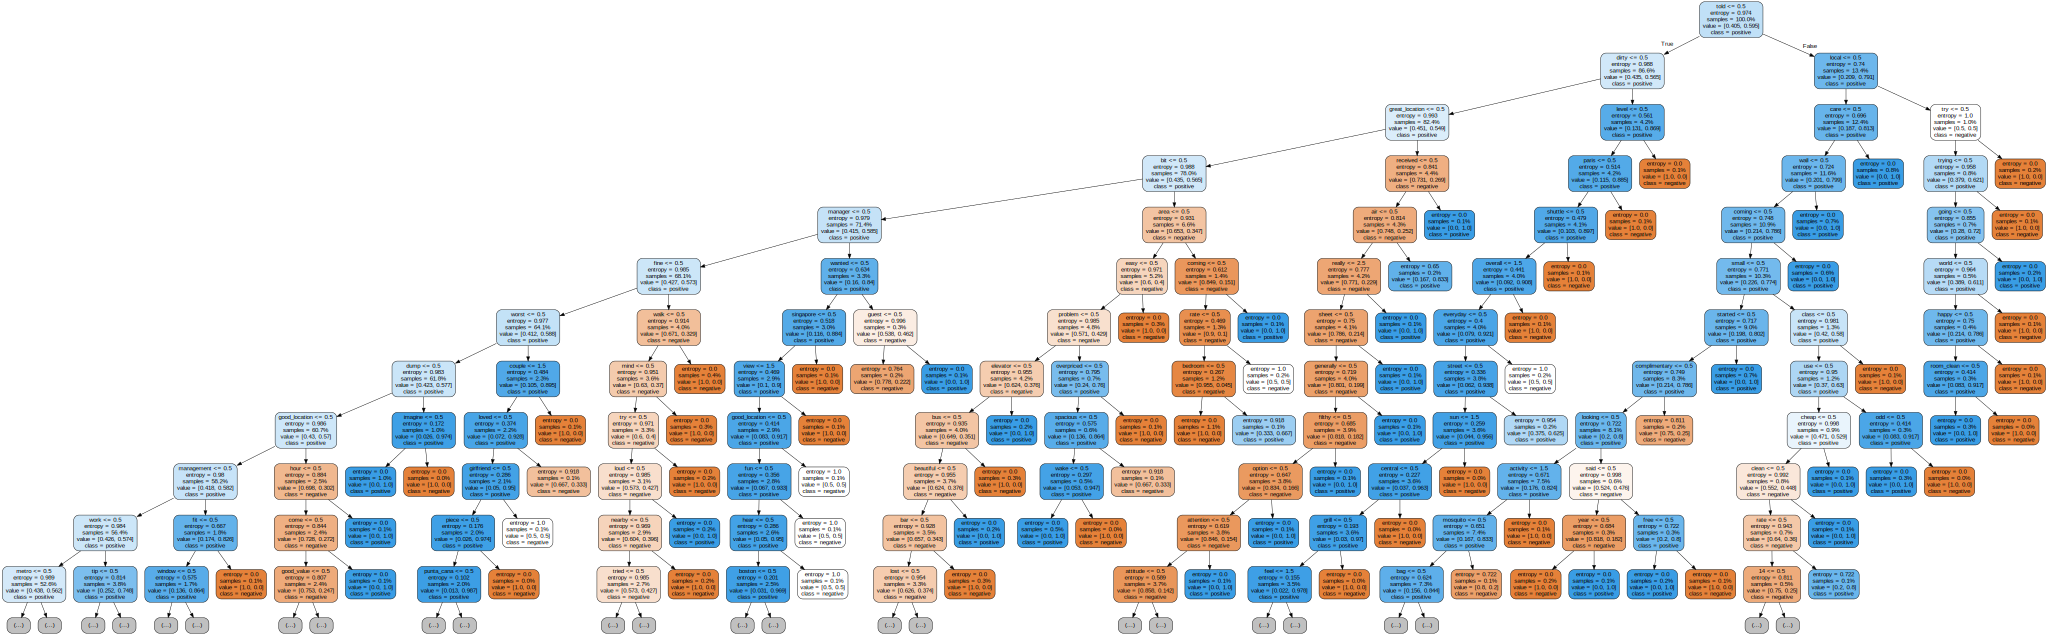

In [55]:
from sklearn.tree import export_graphviz
import graphviz

dot = export_graphviz(best_model,
                proportion=True,
                feature_names=feature_names,
                class_names=['negative', 'positive'],
                filled=True,
                rounded=True,
                max_depth=11)

graph = graphviz.Source(dot)
graph